In [31]:
import pandas as pd
import torch
from train import load_checkpoint
import data_process as dp
torch.__version__
device = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:
model, _ = load_checkpoint("./")

In [33]:
model.to(device)
model.eval()

GPT(
  (token_embedding_table): Embedding(20, 128)
  (position_embedding_table): Embedding(128, 128)
  (blocks): Sequential(
    (0): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
        (c_proj): Linear(in_features=128, out_features=128, bias=True)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=128, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
     

In [34]:
df = pd.read_parquet("./datasets/pdb-no-model-no-asm-64-2048.parquet")

In [35]:
df

,name,3Di,AA
0,pdb1f76.ent.gz_A,DAVVVVLVVLVVDQVVVSLVVVVVVLLVPAPHPCLVVQADDAQFDW...,MYYPFVRKALFQLDPERAHEFTFQQLRRITGTPFEALVRQKVPAKP...
1,pdb4hn3.ent.gz_A,DWDDDQPDQLGATADPPADAALAPPVCVVQAQDPQQVCQVVSVQSN...,IMTKNQISSNYYKTVLPYKASKSRGLVVSNIYSRYDINELESGLMR...
2,pdb6r7p.ent.gz_A,DQDDDDCVLVVVLLVLLVPDPASLVSLVVNQLSCCQVFQANALSVL...,TEFEFPEELKTKLQEHINYFPKKRQAILLCLHEIQNYYGYIPPESL...
3,pdb7pqk.ent.gz,DWKWFWWAWPVDTDIAIDPQPLLLLQQAEKEFALPQVCLVVFADAA...,MGAVALFSARAVDIEVFTTRPDTLFGATYLVLAPEHDLVDELVAAS...
4,pdb2ztn.ent.gz,DFPDKFKDKDKADFFWDDALQFFKFWRDKDFAALQDARYAFKDFDV...,GAILRRQYNLSTSPLTSSVASGTNLVLYAAPLNPLLPLQDGTNTHI...
...,...,...,...
129322,pdb5fqo.ent.gz,DDDDCVVLVVVVVQQVVFCLNVVLLLVLLLLCLVQAAQWEEEEAAC...,LYYECYSDVSVHEEMIADQVRTEAYRLGILKNWAALRGKTVLDVGA...
129323,pdb3q1q.ent.gz_A,DCVLADDCVPCVVVQVVPWDWDDDLWKIKTKDFQPDFAEHEDEDED...,TRRERLRLRRDFLLIFKEGKSLQNEYFVVLFRKNGLDYSRLGIVVK...
129324,pdb6juu.ent.gz,DAEQEPVQKAWPPDPPPDDQQDKTWIARRVVRAIKIKGWHQAFDPV...,FVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKKLLKIEKE...
129325,pdb5t7f.ent.gz_A,DVVVLQVLLCVQLVHHPVVLVVVVDPQSVCLLVVLLVVLLVLLVVL...,VKKLINSQISLLIGKGLHEFDSLRDPEVNDFRTKMRQFCEEAAAHR...


In [55]:
small_df = df.sample(50_000)
small_df

,name,3Di,AA
71931,pdb4po4.ent.gz_A,DAQEACGDDLWGFHPADVPGFGETGNAPSQDQAQDPDDYLRHAAYA...,ACFAAGKDDLCTCSNKTESSPETVDCSSKKLTTVPTGIPTSTEKLQ...
56099,pdb1tti.ent.gz,DAAAFEAEEDECLVVVVLVLVQPDDDDDGHAYEYEDEPVCVVVVVV...,SKPQPIAAANWKSLSELIDLFNSTSINHDVQCVVASTFVHLAMTKE...
17381,pdb5x1m.ent.gz_A,DDDWFLLVLDVPPPQPQQCQAFFQPWFLAPDDFFLFDPDLQVVLVC...,SAPTNLEQVLAAGGNTVEMLRNSQIGAYVYPVVAPEFSNWRTEQWA...
118856,pdb6qzr.ent.gz_A,DVLQPPDLVVLCVVLVVCVVVVVLVSNQVSLLSNLVVQDADDPVSL...,GAMGSMERASLIQKAKLAEQAERYEDMAAFMKGAVEKGEELSCEER...
82759,pdb5co4.ent.gz_A,DLFEEEEEEEQAADLLLQLLLQLVCLVSLYAYEYEDDHNDDPPDPS...,GPHMLHLVLYQPEIPQNAGNVARTAAALGWPLHLIRPLGFLLSSPK...
...,...,...,...
118666,pdb8ugq.ent.gz_A,DPQDPPPPHFFQKDKDFADDPRWDWADQQWDKDFPPFAFDDDDSSH...,RAGSKADRPSLQIQTLQHAGTTMITVPSGGVCDLINTYARGSDEGN...
80356,pdb3hn8.ent.gz_A,DVLWKKWKWAWAADPVQQKTKIWGFKIANFAADDPVRFFFKKKWKD...,GAPCGRISFALRYLYGSDQLVVRILQALDLPAKDSNGFSDPYVKIY...
94217,pdb3wr9.ent.gz_A,DAEFFAKEWALDCVQVCCLVVVVCVPPLPVVLLVQQVVLLVVCVVV...,AKIIGGFAVSHTPTIAFAHDANKYDDPVWAPIFQGFEPVKQWLAEQ...
13183,pdb6zgg.ent.gz_A,DADAFPPAAEDDWDKDWDADDWAEDPDDDFDAQDKDWDWDWTADHG...,QCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFF...


In [79]:
dfvenome = pd.read_csv("./data-venome.csv")
dfvenome

,name,3Di
0,Gh_comp10207_c0_seq2.pdb,DWFQVLCVPHDQQLFWFWQDDPDDPVPTDTWGFPDKDADPQWDDCV...
1,Gh_comp1045_c0_seq1.pdb,DLQLQQDAQVVLLVVLVADLQQWAAPVSLVVQCVVAPWQAADDDDD...
2,Gh_comp10466_c0_seq1.pdb,DVVVVVVDDLVRNLVVVVVCCVVVVVVLVVPDDDDPLVVVVVVVVV...
3,Gh_comp1063_c0_seq1.pdb,DQFDFPVQLLPDPDPVSLVVSDDPPGDFDPDFFFAEEEEAAPQQQA...
4,Gh_comp1068_c0_seq5.pdb,DPPPDPDPPDQPDQDLQFDDDPVVLVVLLPDDDDQVFWWWAADPFQ...
...,...,...
381,Lh14_comp82_c1_seq1.pdb,DVVVVVVVVVVVVVLCVQAVQDPVLLVVLVVLLVVLLVVLLVVQPP...
382,Lh14_comp82_c1_seq3.pdb,DVPPLVPPDPPDDDDDDQPADDPVLLVLLVVLLVCLLVVLCVQCVP...
383,Lh14_comp835_c0_seq1.pdb,DDFFDFDDQDWFQWLVGIDGCLVVLAQAKEKEWEAFDFPDDLVLVQ...
384,Lh14_comp862_c0_seq1.pdb,DPPPVVVVVVVVVVVVVVLVVVQVVVVVAPPPDDDDDDDDDDDDDD...


In [57]:
combined = pd.concat((dfvenome, small_df[["name", "3Di"]]))

In [60]:
def to_avg_embedding(df):
    with torch.no_grad():
        res = torch.zeros((len(df["3Di"]), 128))
        for i, (repr, name) in enumerate(zip(df["3Di"], df["name"])):
            seq = torch.tensor([dp.encode(repr)], dtype=torch.long, device=device)
            embeddings = model.seq_embeddings(seq).detach().cpu()
            if len(embeddings.shape) > 1:
                embeddings = embeddings.mean(0)
            res[i, :] = embeddings
            print(name + "\t" + str(i), end="\r")
        return res
res = to_avg_embedding(combined)

In [42]:
def to_embeddings(df):
    with torch.no_grad():
        res = []
        names = []
        for i, (repr, name) in enumerate(zip(df["3Di"], df["name"])):
            seq = torch.tensor([dp.encode(repr)], dtype=torch.long, device=device)
            embeddings = model.seq_embeddings(seq).detach().cpu()
            if len(embeddings.shape) == 1:
                embeddings = embeddings.reshape(1, 128)
            res.extend(embeddings.tolist())
            names.extend([name]*embeddings.shape[0])
            
            print(name + "\t" + str(i), end="\r")
        return res, names
# res, names = to_embeddings(small_df)

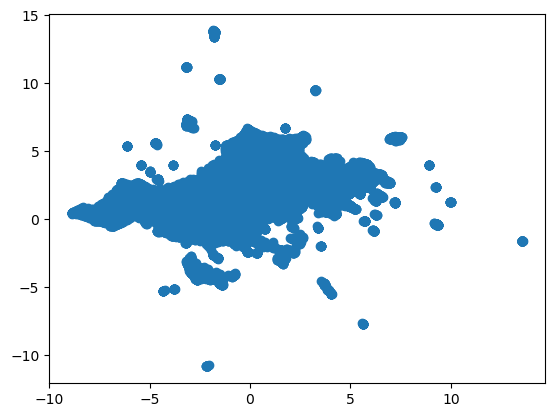

In [77]:
import matplotlib.pyplot as plt
import umap

mapper = umap.UMAP(n_neighbors=32)
embed2D = mapper.fit_transform(res)
plt.scatter(embed2D[:, 0], embed2D[:, 1])

In [78]:
pd.DataFrame({"x": embed2D[:, 0], "y": embed2D[:, 1], "name": combined["name"]}).to_parquet("embed2D-venome.parquet")